In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_fromat = 'retina'

* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25000 sq.ft
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river;0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dewelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston emplotment centres
* RAD index of accessibility to radial highways
* Tax full-value property-tax rate per 10000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk-0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in 1000's

In [3]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/boston_house_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

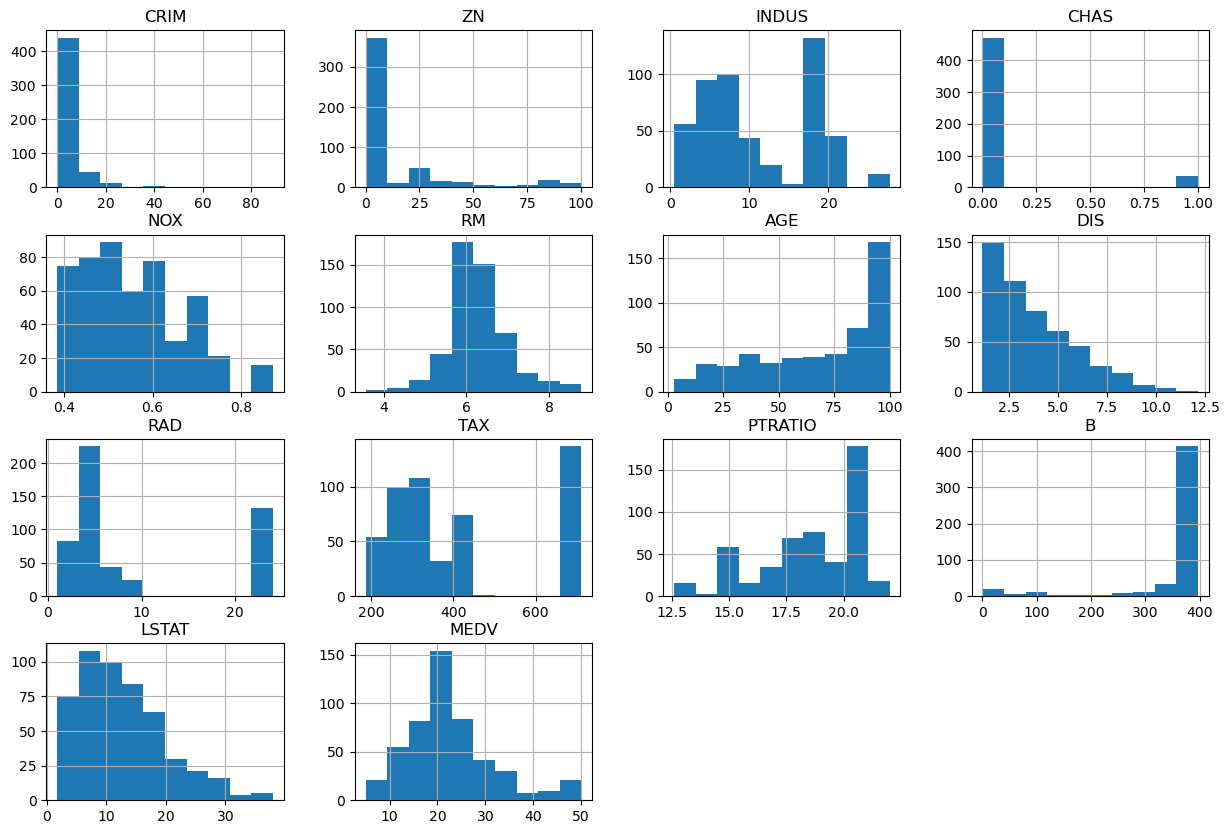

In [4]:
df.hist(figsize=(15,10))

In [5]:
from sklearn import preprocessing

In [10]:
(df['AGE']>df.AGE.mean()).astype(int).head()

0    0
1    1
2    0
3    0
4    0
Name: AGE, dtype: int32

# Use binarize() function

In [16]:
mat = preprocessing.binarize(df[['AGE']],threshold=df.AGE.mean())
mat[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [17]:
df['age_cat']=mat[:,0]

In [18]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0


In [19]:
cols = ['DIS','RM','MEDV']
mat = preprocessing.binarize(df[cols],threshold=[5,7,df.MEDV.mean()])
mat[:5]

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

# Use Binarizer() class (good when using with pipeline)

In [20]:
pbin = preprocessing.Binarizer(threshold=[5,7,df.MEDV.mean()])
cols = ['DIS','RM','MEDV']
mat = pbin.fit_transform(df[cols])
mat[:5]

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

In [23]:
dn = pd.concat([df,pd.DataFrame(mat,columns=['dis_cat','rm_cat','medv_cat'])],axis=1)
dn

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age_cat,dis_cat,rm_cat,medv_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.0,0.0,0.0,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1.0,0.0,0.0,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0,0.0,1.0,1.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0,1.0,0.0,1.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1.0,0.0,0.0,0.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1.0,0.0,0.0,0.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1.0,0.0,0.0,1.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1.0,0.0,0.0,0.0


# LogisticRegression for classifying house price

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'age_cat'],
      dtype='object')

In [32]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y = preprocessing.binarize(df[['MEDV']],threshold=df.MEDV.mean())
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [40]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chopp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model.score(X_train,y_train)

0.903954802259887

In [42]:
model.intercept_

array([0.0701684])

In [43]:
model.coef_

array([[-0.08522396,  0.00898859, -0.04255848,  0.15233981,  0.02428083,
         0.93303436, -0.01462444, -0.33786484,  0.12579967, -0.00342001,
        -0.28146064,  0.01220203, -0.25017092]])

In [44]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [46]:
pd.Series(model.coef_.ravel(),index=X.columns) #ravel ทำเป็น array 1 มิติ

CRIM      -0.085224
ZN         0.008989
INDUS     -0.042558
CHAS       0.152340
NOX        0.024281
RM         0.933034
AGE       -0.014624
DIS       -0.337865
RAD        0.125800
TAX       -0.003420
PTRATIO   -0.281461
B          0.012202
LSTAT     -0.250171
dtype: float64

In [47]:
from sklearn import metrics

In [48]:
y_pred = model.predict(X_test)

In [49]:
metrics.confusion_matrix(y_test,y_pred)

array([[77,  7],
       [15, 53]], dtype=int64)

In [53]:
pd.crosstab(y_test.ravel(),y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True,margins_name='Total')

Predicted,0.0,1.0,Total
Actual,,,
0.0,77,7,84
1.0,15,53,68
Total,92,60,152


In [55]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        84
         1.0       0.88      0.78      0.83        68

    accuracy                           0.86       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.86      0.86      0.85       152

